**<h3>Python Script Imports</h3>**

In [2]:
import os
import sys
import importlib    
import numpy as np
    
#Paths
housing_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/datasets/housing.csv"
python_scripts_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/python-scripts"

#Path initialization so that Python can see where our script lies.
script_dir = os.path.abspath(python_scripts_path) 
sys.path.append(script_dir)

#Imports
from sklearn.model_selection import StratifiedShuffleSplit

from test_set_check import test_set_check

from split_train_test_by_id import split_train_test_by_id
from load_housing_data import load_housing_data


In [5]:
housing = load_housing_data(housing_path)
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

**<h3>Stratified sampling</h3>**

**<h5>Definition</h5>**
- **Homogenous Strata**: small groups **(strata)** with similar characteristics **(homogenous)**

<p align="center">
  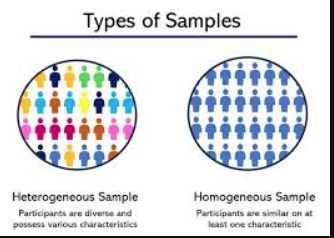 
</p>

- Example: In 10000 high school students surveyed, there are some types of students:
  - Students who excel at Natural Science subjects (e.g. Mathematics)
  - Students who excel at Social Science (e.g. Literature)
- Each of these group is called Homogenous Strata.
(attachment:cd6631ee-5ff5-4bf8-ae31-9f4acd5bfe71.png)

**<h5>Description</h5>**
  - Take the entire population (e.g. take all Vietnamese students participating the National Exam)
  - Divide them into groups with similar characteristics (a.k.a Homogenous Strata)
  - For each stratum, pick a right number of instances (students)

**<h5>Notes</h5>**
  - Number of smaller groups (strata) should not be too high/low.
  - Each stratum (group) should not have too many instances
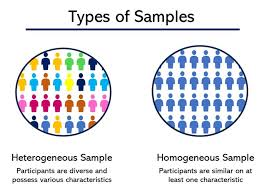

**<h3>Example</h3>**
You're researching, for example, 10000 housings (families with houses).
- Each has attributes like (`median_income`, `median_household_price`,...)
- Experts say: **`median_income`** is the most important attribute. 
- You take this + divide into multiple median_income categories , using this function

<p align="center">
  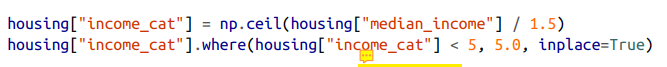 
</p>

In [11]:
#limits number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) 
#merge "larger than 5" categories into category 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=False) 

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

<h5>The result</h5>

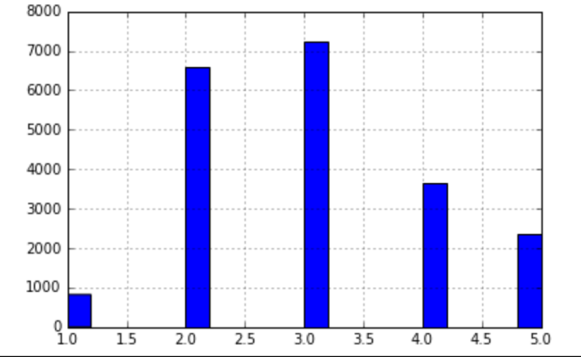

**=>** You have 5 `median_income` categories (a.k.a 5 groups of people with similar income - **5 homogenous strata**). Call it homogenous strata because:

  - Group 1: Includes people with **similar income** of under 1000

  - Group 2: Includes people with **similar income** of nearly 7000

  - ...

- Next, you take those 10000 housings and feed it to the StatifiedShuffleSplit to split 10000 housings into 5 groups (strata)

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

income_cat
3.0     0.350533
2.0     0.318798
4.0     0.176357
5.0     0.069041
1.0     0.039729
6.0     0.025678
7.0     0.009205
8.0     0.005087
11.0    0.002422
9.0     0.002422
10.0    0.000727
Name: count, dtype: float64


In [4]:
corr_matrix = housing.corr()

ValueError: could not convert string to float: 'NEAR BAY'